# PROYECTO: COMPRESIÓN DE IMÁGENES USANDO K-MEANS CLUSTERING
## Descripción: Este proyecto reduce el número de colores en una imagen usando el algoritmo K-means y visualiza el análisis completo.


# 1. IMPORTACIÓN DE LIBRERÍAS

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


# 2. CARGA DE LA IMAGEN


In [104]:
# Ruta de la imagen (modifica esta ruta con tu imagen)
image_path = 'data/original/img-miro.png'  # Cambia esto por tu imagen

# Cargar imagen
original_image = Image.open(image_path)
original_image = original_image.convert('RGB')

# Información básica
width, height = original_image.size
print(f"📊 INFORMACIÓN DE LA IMAGEN")
print(f"   Dimensiones: {width} x {height} píxeles")
print(f"   Píxeles totales: {width * height:,}")
print(f"   Modo: {original_image.mode}")

📊 INFORMACIÓN DE LA IMAGEN
   Dimensiones: 685 x 515 píxeles
   Píxeles totales: 352,775
   Modo: RGB


# 3. CONVERSIÓN A ARRAY Y ANÁLISIS INICIAL

In [105]:
# Convertir imagen a array numpy
img_array = np.array(original_image)
print(f"   Shape del array: {img_array.shape}")
print(f"   Tipo de datos: {img_array.dtype}")
print(f"   Tamaño en memoria: {img_array.nbytes / 1024:.2f} KB")

# Reshapear para obtener lista de píxeles [n_pixels, 3]
original_pixels = img_array.reshape(-1, 3)
print(f"\n   Píxeles reshape: {original_pixels.shape}")

   Shape del array: (515, 685, 3)
   Tipo de datos: uint8
   Tamaño en memoria: 1033.52 KB

   Píxeles reshape: (352775, 3)


# 4. ANÁLISIS DE COLORES ORIGINALES

In [106]:
# Obtener colores únicos
unique_colors_original = np.unique(original_pixels, axis=0)
n_unique_original = len(unique_colors_original)

print(f"\n🎨 ANÁLISIS DE COLORES - IMAGEN ORIGINAL")
print(f"   Colores únicos: {n_unique_original:,}")
print(f"   Total de píxeles: {len(original_pixels):,}")


🎨 ANÁLISIS DE COLORES - IMAGEN ORIGINAL
   Colores únicos: 70,252
   Total de píxeles: 352,775


# 5. VISUALIZACIÓN DE LA IMAGEN ORIGINAL

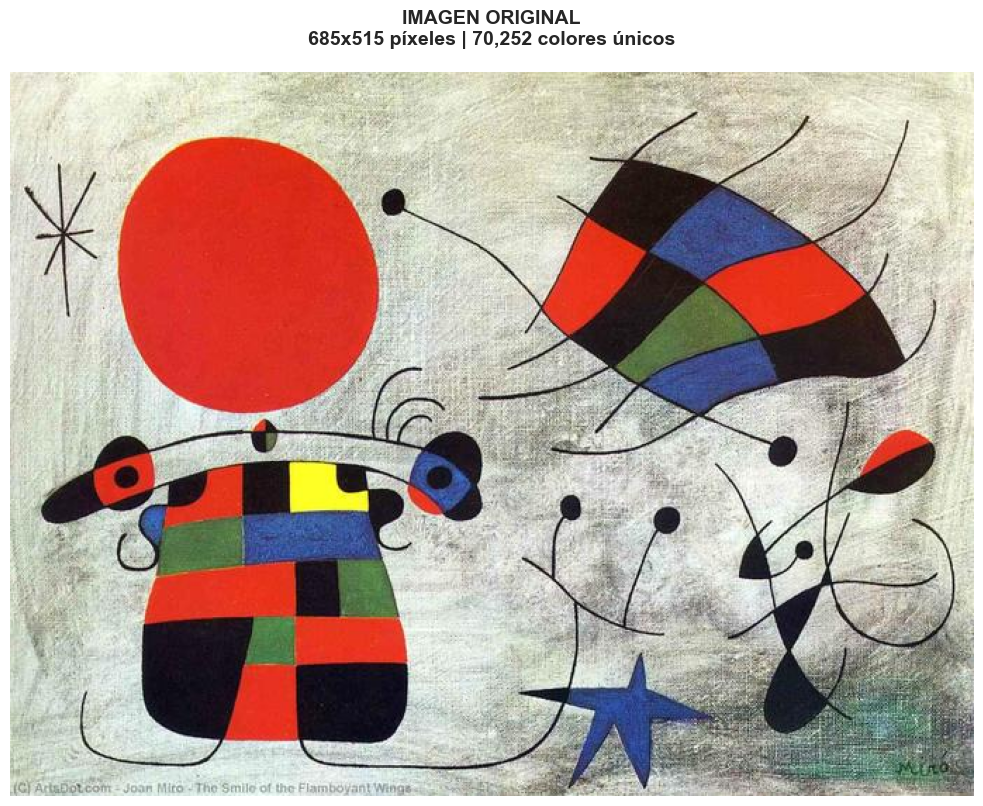

In [107]:
plt.figure(figsize=(10, 8))
plt.imshow(original_image)
plt.axis('off')
plt.title(f'IMAGEN ORIGINAL\n{width}x{height} píxeles | {n_unique_original:,} colores únicos',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 6. NUBE DE PUNTOS 3D - COLORES ORIGINALES


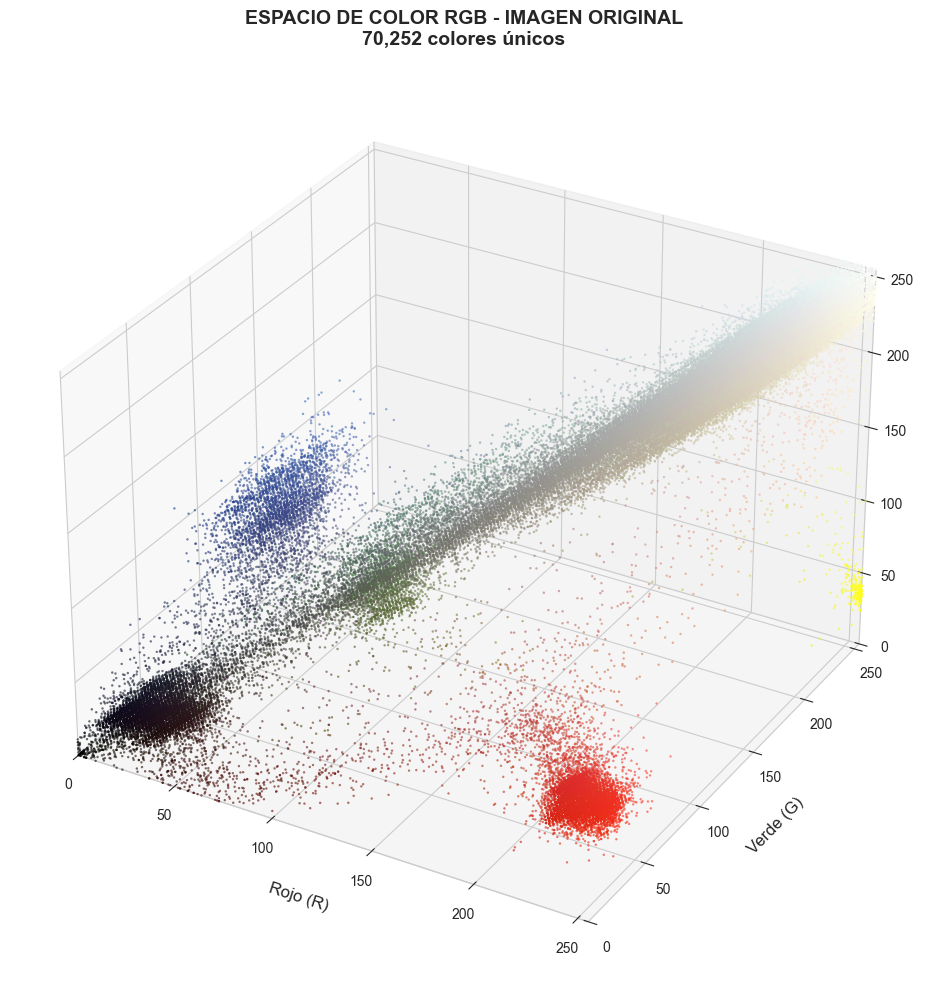

In [108]:
# Muestrear píxeles para visualización (para evitar sobrecarga)
sample_size = 100000
if len(original_pixels) > sample_size:
    indices = np.random.choice(len(original_pixels), sample_size, replace=False)
    sampled_pixels_original = original_pixels[indices]
else:
    sampled_pixels_original = original_pixels

# Crear visualización 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Normalizar colores para matplotlib (0-1)
colors_normalized = sampled_pixels_original / 255.0

# Plotear puntos
scatter = ax.scatter(
    sampled_pixels_original[:, 0],  # Canal Rojo
    sampled_pixels_original[:, 1],  # Canal Verde
    sampled_pixels_original[:, 2],  # Canal Azul
    c=colors_normalized,
    s=3,
    alpha=0.6,
    edgecolors='none'
)

ax.set_xlabel('Rojo (R)', fontsize=12, labelpad=10)
ax.set_ylabel('Verde (G)', fontsize=12, labelpad=10)
ax.set_zlabel('Azul (B)', fontsize=12, labelpad=10)
ax.set_title(f'ESPACIO DE COLOR RGB - IMAGEN ORIGINAL\n{n_unique_original:,} colores únicos',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)

plt.tight_layout()
plt.show()

# 7. HISTOGRAMA DE DISTRIBUCIÓN DE COLORES ORIGINALES

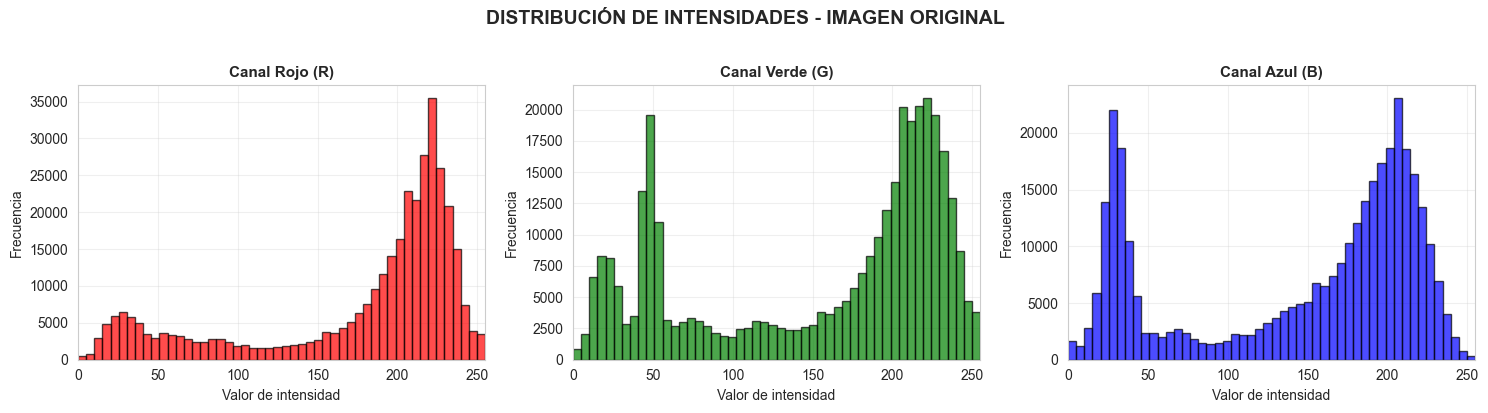

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

colors = ['red', 'green', 'blue']
labels = ['Rojo (R)', 'Verde (G)', 'Azul (B)']

for i, (ax, color, label) in enumerate(zip(axes, colors, labels)):
    ax.hist(original_pixels[:, i], bins=50, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Valor de intensidad', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Canal {label}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 255)

plt.suptitle('DISTRIBUCIÓN DE INTENSIDADES - IMAGEN ORIGINAL',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Calculando métricas para diferentes valores de k...
k=2: Inercia=48913587.93, Silhouette=0.6613
k=3: Inercia=25360197.79, Silhouette=0.7191
k=4: Inercia=16007374.45, Silhouette=0.5881
k=5: Inercia=9135076.50, Silhouette=0.6025
k=6: Inercia=7068547.16, Silhouette=0.5415
k=7: Inercia=5982821.99, Silhouette=0.5434
k=8: Inercia=4724018.36, Silhouette=0.5670
k=9: Inercia=3773120.85, Silhouette=0.5350
k=10: Inercia=3306811.61, Silhouette=0.5161
k=11: Inercia=3043645.43, Silhouette=0.5036
k=12: Inercia=2902082.50, Silhouette=0.4680
k=13: Inercia=2707998.85, Silhouette=0.4631
k=14: Inercia=2452337.86, Silhouette=0.4399
k=15: Inercia=2272177.77, Silhouette=0.4241
k=16: Inercia=2268652.14, Silhouette=0.4241
k=17: Inercia=2055334.87, Silhouette=0.4000
k=18: Inercia=1971198.75, Silhouette=0.3823
k=19: Inercia=1927860.90, Silhouette=0.3771
k=20: Inercia=1786928.49, Silhouette=0.3824


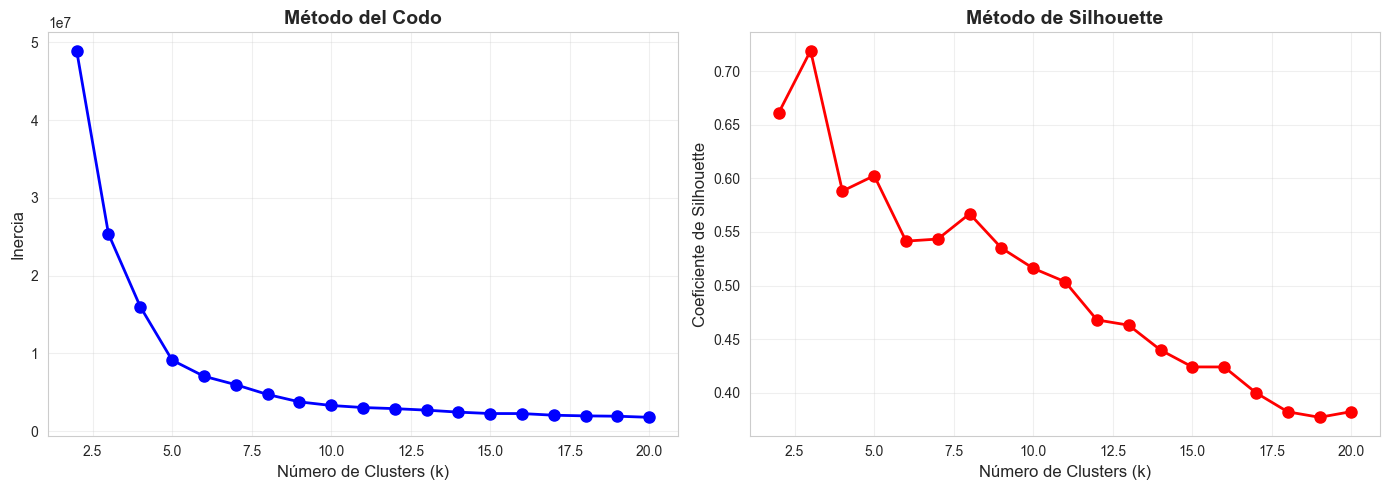

In [115]:
# Muestra más pequeña para acelerar
sample_size = min(10000, len(original_pixels))  # Reducido de 50000 a 10000
sample_indices = np.random.choice(len(original_pixels), sample_size, replace=False)
sample_pixels = original_pixels[sample_indices]

# Rango de clusters a probar
k_range = range(2, 21)
inertias = []
silhouette_scores = []

print("Calculando métricas para diferentes valores de k...")
for k in k_range:
    # Usar MiniBatchKMeans en lugar de KMeans
    kmeans_temp = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=1024,
        max_iter=100,
        n_init=3  # Reducido de 10 a 3
    )
    kmeans_temp.fit(sample_pixels)

    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(sample_pixels, kmeans_temp.labels_))

    print(f"k={k}: Inercia={kmeans_temp.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Crear gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Método del codo
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters (k)', fontsize=12)
ax1.set_ylabel('Inercia', fontsize=12)
ax1.set_title('Método del Codo', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Método de Silhouette
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters (k)', fontsize=12)
ax2.set_ylabel('Coeficiente de Silhouette', fontsize=12)
ax2.set_title('Método de Silhouette', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. APLICACIÓN DEL ALGORITMO K-MEANS

In [111]:
from sklearn.cluster import KMeans
import time

# Definir número de clusters (colores finales)
n_clusters = 5  # Puedes cambiar este valor

print(f"🔄 APLICANDO K-MEANS CLUSTERING")
print(f"   Número de clusters (K): {n_clusters}")
print(f"   Procesando {len(original_pixels):,} píxeles...")

# Medir tiempo de ejecución
start_time = time.time()

kmeans = KMeans(
    n_clusters=n_clusters,
    init='k-means++',      # Mejor inicialización
    n_init=10,             # Más intentos para encontrar el mejor resultado
    max_iter=300,          # Más iteraciones para convergencia
    tol=1e-4,              # Tolerancia más estricta
    random_state=42,
    algorithm='lloyd',     # Algoritmo clásico (más preciso)
    verbose=0
)
labels = kmeans.fit_predict(original_pixels)

# Calcular tiempo transcurrido
elapsed_time = time.time() - start_time

print(f"✓ K-means completado en {elapsed_time:.2f} segundos")
print(f"   Iteraciones realizadas: {kmeans.n_iter_}")
print(f"   Inercia final: {kmeans.inertia_:.2f}")

# Obtener centros (colores representativos)
centers = kmeans.cluster_centers_.astype(int)

print(f"\n🎨 CENTROS DE CLUSTERS (COLORES FINALES):")
for i, center in enumerate(centers):
    hex_color = f'#{center[0]:02x}{center[1]:02x}{center[2]:02x}'
    # Calcular cuántos píxeles pertenecen a este cluster
    pixels_in_cluster = np.sum(labels == i)
    percentage = (pixels_in_cluster / len(labels)) * 100
    print(f"   Cluster {i+1:2d}: RGB{tuple(center)} -> {hex_color} ({percentage:.2f}% de píxeles)")

🔄 APLICANDO K-MEANS CLUSTERING
   Número de clusters (K): 5
   Procesando 352,775 píxeles...
✓ K-means completado en 1.12 segundos
   Iteraciones realizadas: 3
   Inercia final: 306587770.86

🎨 CENTROS DE CLUSTERS (COLORES FINALES):
   Cluster  1: RGB(np.int64(220), np.int64(223), np.int64(209)) -> #dcdfd1 (41.90% de píxeles)
   Cluster  2: RGB(np.int64(31), np.int64(23), np.int64(27)) -> #1f171b (11.15% de píxeles)
   Cluster  3: RGB(np.int64(222), np.int64(49), np.int64(33)) -> #de3121 (13.63% de píxeles)
   Cluster  4: RGB(np.int64(87), np.int64(102), np.int64(108)) -> #57666c (11.23% de píxeles)
   Cluster  5: RGB(np.int64(181), np.int64(183), np.int64(167)) -> #b5b7a7 (22.09% de píxeles)


# 10. CONSTRUCCIÓN DE LA IMAGEN COMPRIMIDA

In [112]:
# Reemplazar cada píxel por su centro correspondiente
compressed_pixels = centers[labels]

# Reshapear de vuelta a imagen
compressed_array = compressed_pixels.reshape(height, width, 3).astype(np.uint8)

# Crear imagen PIL
compressed_image = Image.fromarray(compressed_array)

# Guardo la imagen
compressed_image.save('data/compressed/img-miro-compressed.png', format='PNG', optimize=True)
print("✓ Imagen comprimida guardada como 'img-miro-compress.png'")

print(f"✓ Imagen comprimida creada")
print(f"   Dimensiones: {compressed_image.size}")
print(f"   Tipo de datos: {compressed_array.dtype}")
print(f"   Tamaño en memoria: {compressed_array.nbytes / 1024:.2f} KB")

✓ Imagen comprimida guardada como 'img-miro-compress.png'
✓ Imagen comprimida creada
   Dimensiones: (685, 515)
   Tipo de datos: uint8
   Tamaño en memoria: 1033.52 KB


# 11. ANÁLISIS DE COLORES COMPRIMIDOS

In [113]:
# Obtener colores únicos de la imagen comprimida
unique_colors_compressed = np.unique(compressed_pixels, axis=0)
n_unique_compressed = len(unique_colors_compressed)

print(f"\n🎨 ANÁLISIS DE COLORES - IMAGEN COMPRIMIDA")
print(f"   Colores únicos: {n_unique_compressed:,}")
print(f"   Total de píxeles: {len(compressed_pixels):,}")

# Calcular reducción
reduction = (1 - n_unique_compressed / n_unique_original) * 100
print(f"\n   📊 RESULTADOS DE COMPRESIÓN:")
print(f"   Colores originales: {n_unique_original:,}")
print(f"   Colores comprimidos: {n_unique_compressed:,}")
print(f"   Reducción de colores: {reduction:.2f}%")


🎨 ANÁLISIS DE COLORES - IMAGEN COMPRIMIDA
   Colores únicos: 5
   Total de píxeles: 352,775

   📊 RESULTADOS DE COMPRESIÓN:
   Colores originales: 70,252
   Colores comprimidos: 5
   Reducción de colores: 99.99%


# 12. VISUALIZACIÓN DE LA IMAGEN COMPRIMIDA

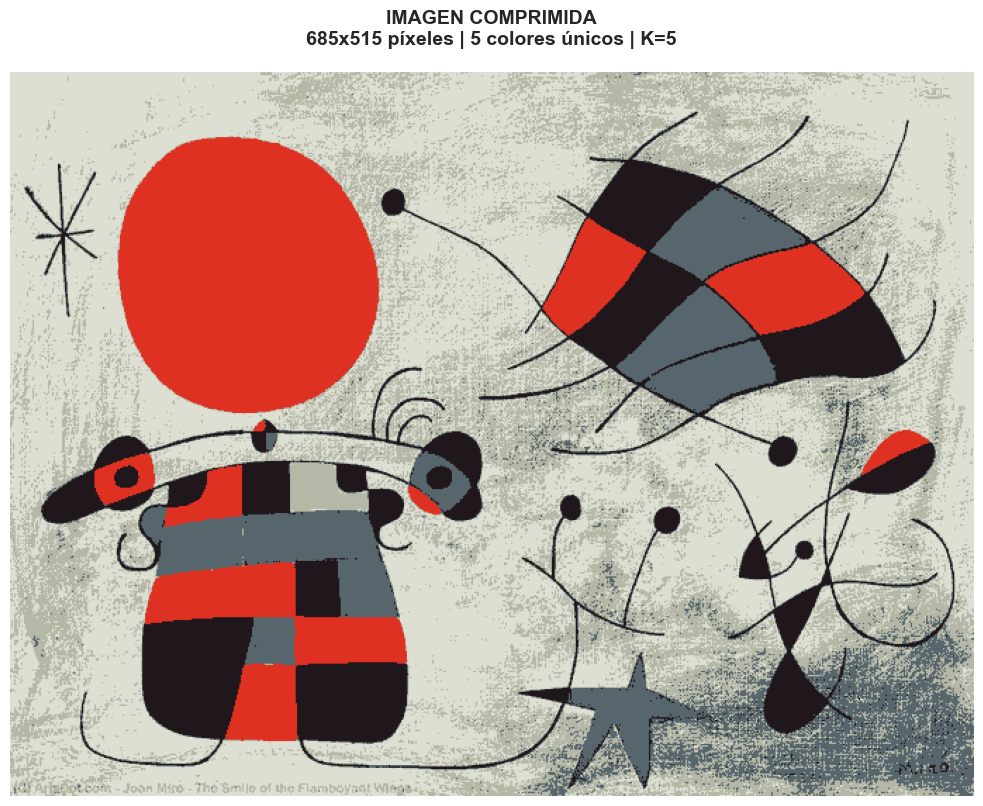

In [114]:
plt.figure(figsize=(10, 8))
plt.imshow(compressed_image)
plt.axis('off')
plt.title(f'IMAGEN COMPRIMIDA\n{width}x{height} píxeles | {n_unique_compressed:,} colores únicos | K={n_clusters}',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 13. NUBE DE PUNTOS 3D - PIXELES COMPRIMIDOS

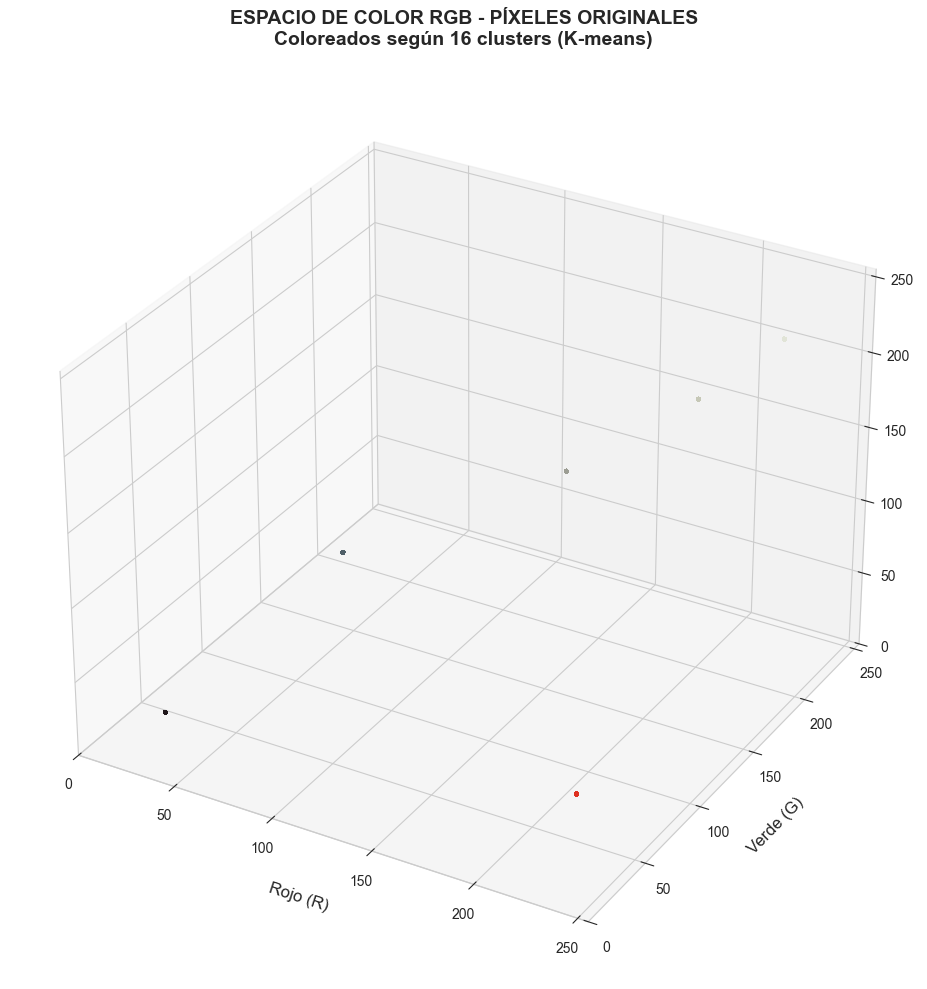


Centros K-means (RGB):
Centro 1: R=225, G=228, B=215
Centro 2: R=79, G=95, B=104
Centro 3: R=222, G=49, B=33
Centro 4: R=156, G=157, B=147
Centro 5: R=31, G=23, B=26
Centro 6: R=198, G=200, B=183


In [92]:
# Muestrear PÍXELES ORIGINALES para visualización
sample_size = min(100000, len(compressed_pixels))
indices = np.random.choice(len(compressed_pixels), sample_size, replace=False)
sampled_original_pixels = compressed_pixels[indices]
sampled_labels = labels[indices]

# Crear visualización 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Colorear cada píxel según su cluster asignado
colors_normalized = centers[sampled_labels] / 255.0

# Plotear puntos ORIGINALES
scatter = ax.scatter(
    sampled_original_pixels[:, 0],  # Valores R originales
    sampled_original_pixels[:, 1],  # Valores G originales
    sampled_original_pixels[:, 2],  # Valores B originales
    c=colors_normalized,  # Coloreados por cluster
    s=10,
    alpha=0.4,
    edgecolors='none'
)

ax.set_xlabel('Rojo (R)', fontsize=12, labelpad=10)
ax.set_ylabel('Verde (G)', fontsize=12, labelpad=10)
ax.set_zlabel('Azul (B)', fontsize=12, labelpad=10)
ax.set_title(f'ESPACIO DE COLOR RGB - PÍXELES ORIGINALES\nColoreados según 16 clusters (K-means)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)

plt.tight_layout()
plt.show()

# Mostrar información de los centros
print("\nCentros K-means (RGB):")
for i, center in enumerate(centers):
    print(f"Centro {i+1}: R={center[0]:.0f}, G={center[1]:.0f}, B={center[2]:.0f}")